# Configurações

In [ ]:
%pip install -r ./../requirements.txt

# Import's

In [1]:
from AlgoritmoGenetico import AlgoritmoGenetico, AlgoritmoGeneticoParalelo
import matplotlib.pyplot as plt
import statistics
import json

# Valores de Configuração

In [2]:
qtd_execucoes = 10 ## Quantidade de execuções a serem realizadas por parametro, para realização da média de tempo gasto
random_seed = 7 ## Random seed a ser usada
lista_qtd_geracoes = [25, 50, 75, 100] ## Lista com a quantidade de gerações a serem realizadas
lista_qtd_individuos = [100, 250, 500, 1000] ## Lista com a quantidade de individuos a serem criados por geração
lista_qtd_threads = [2, 4, 6, 8] ## Lista com a quantidade de threads a serem utilizadas

# Criando as Instâncias dos Algoritmos Genéticos

In [3]:
AG = AlgoritmoGenetico(random_seed=random_seed) ## Cria uma instância do Algoritmo Genético Sequencial
AGP = AlgoritmoGeneticoParalelo(random_seed=random_seed) ## Cria uma instância do Algoritmo Genético Paralelo

# Executando

In [4]:
resultado_final = [] ## Armazena os valores resultantes das execuções

for geracoes in lista_qtd_geracoes: ## Percorre a lista pegando a quantidade de gerações

    print("- Inicializada a etapa com " + str(geracoes) + " gerações!")

    ## Configuração da quantidade de gerações dos Algoritmos Geneticos - Inicio
    AG.set_qtd_geracoes(geracoes) ## Set da quantidade de geração do AG Sequencial
    AGP.set_qtd_geracoes(geracoes) ## Set da quantidade de geração do AG Paralelo
    ############################# - Fim

    lista_resultados_individuos = []

    for individuos in lista_qtd_individuos: ## Percorre a lista pegando a quantidade de individuos

        print("\t- Inicializada a etapa com " + str(individuos) + " individuos!")

        ## Configuração da quantidade de individuos dos Algoritmos Geneticos - Inicio
        AG.set_qtd_individuos(individuos) ## Set da quantidade de individuos do AG Sequencial
        AGP.set_qtd_individuos(individuos) ## Set da quantidade de individuos do AG Paralelo
        ############################# - Fim

        print("\t\t- Inicializada a etapa de execução do Algoritmo Genético Sequencial!")

        ## Execução do Algoritmo Genético Sequencial - Inicio
        lista_resultados_sequenciais = [] ## Armazena o resultados das execuções do AG Sequencial com determinada configuração
        for execucao in range(qtd_execucoes): ## Executando o código X vezes
            lista_resultados_sequenciais.append(AG.start[1]) ## Salvando o tempo gasto na execução
        ############################# - Fim

        print("\t\t- Finalizada a etapa de execução do Algoritmo Genético Sequencial!")

        print("\t\t- Inicializada a etapa de execução do Algoritmo Genético Paralelo!")

        ## Execução do Algoritmo Genético Paralelo - Inicio
        lista_resultados_paralelos = [] ## Armazena o resultados das execuções do AG Paralelo com determinada configuração
        for threads in lista_qtd_threads: ## Percorre a lista  pegando a quantidade de threads
            lista_resultados_paralelos_thread = [] ## Armazena os resultados das execuções do AG Paralelo por thread
            
            ## Configuração da quantidade de threads dos Algoritmos Geneticos PAralelo - Inicio
            AGP.set_qtd_threads(threads) ## Set da quantidade de threads do AG Paralelo
            ############################# - Fim

            print("\t\t\t- Inicializada a execução com " + str(threads) + " threads!")

            for execucao in range(qtd_execucoes): ## Executando o código X vezes
                lista_resultados_paralelos_thread.append(AGP.start[1]) ## Salvando o tempo gasto na execução
            lista_resultados_paralelos.append(dict({"threads" : threads, "resultado" : statistics.mean(lista_resultados_paralelos_thread)}))
        
            print("\t\t\t- Finalizada a execução com " + str(threads) + " threads!")
        
        ############################# - Fim

        print("\t\t- Finalizada a etapa de execução do Algoritmo Genético Paralelo!")

        ## Preparando os resultados obtidos por individuo - Inicio
        lista_resultados_individuos.append(
            dict({
                "individuos" : individuos,
                "resultado_sequencial" : statistics.mean(lista_resultados_sequenciais),
                "resultado_paralelo" : lista_resultados_paralelos
            })
        )
        ############################# - Fim

        print("\t- Finalizada a etapa com " + str(individuos) + " individuos!")

    ## Preparando os resultados obtidos por individuo - Inicio
    resultado_final.append(
        dict({
            "geracao" : geracoes,
            "resultado" : lista_resultados_individuos
        })
    )
    ############################# - Fim

    print("- Finalizada a etapa com " + str(geracoes) + " gerações!")


- Inicializada a etapa com 5 gerações!
	- Inicializada a etapa com 50 individuos!
		- Inicializada a etapa de execução do Algoritmo Genético Sequencial!
		- Finalizada a etapa de execução do Algoritmo Genético Sequencial!
		- Inicializada a etapa de execução do Algoritmo Genético Paralelo!
			- Inicializada a execução com 2 threads!
			- Finalizada a execução com 2 threads!
			- Inicializada a execução com 4 threads!
			- Finalizada a execução com 4 threads!
			- Inicializada a execução com 6 threads!
			- Finalizada a execução com 6 threads!
			- Inicializada a execução com 8 threads!
			- Finalizada a execução com 8 threads!
		- Finalizada a etapa de execução do Algoritmo Genético Paralelo!
	- Finalizada a etapa com 50 individuos!
	- Inicializada a etapa com 100 individuos!
		- Inicializada a etapa de execução do Algoritmo Genético Sequencial!
		- Finalizada a etapa de execução do Algoritmo Genético Sequencial!
		- Inicializada a etapa de execução do Algoritmo Genético Paralelo!
			-

# Salvando os Resultados

In [5]:
with open("resultados.json", "w") as arquivo:
    json.dump(resultado_final, arquivo, indent=4)
    arquivo.close()

# Lendo os Resultados Salvos

In [6]:
with open("resultados.json", "r") as arquivo:
    resultado_final = json.load(arquivo)
    arquivo.close()

# Observando os Resultados

In [7]:
resultado_final

[{'geracao': 5,
  'resultado': [{'individuos': 50,
    'resultado_sequencial': 0.01818814277648926,
    'resultado_paralelo': [{'threads': 2, 'resultado': 0.09540717601776123},
     {'threads': 4, 'resultado': 0.05271930694580078},
     {'threads': 6, 'resultado': 0.044101619720458986},
     {'threads': 8, 'resultado': 0.04326791763305664}]},
   {'individuos': 100,
    'resultado_sequencial': 0.03015916347503662,
    'resultado_paralelo': [{'threads': 2, 'resultado': 0.07829141616821289},
     {'threads': 4, 'resultado': 0.11433300971984864},
     {'threads': 6, 'resultado': 0.0852536678314209},
     {'threads': 8, 'resultado': 0.0874631404876709}]},
   {'individuos': 250,
    'resultado_sequencial': 0.1441883087158203,
    'resultado_paralelo': [{'threads': 2, 'resultado': 0.31249499320983887},
     {'threads': 4, 'resultado': 0.35045979022979734},
     {'threads': 6, 'resultado': 0.4170164823532104},
     {'threads': 8, 'resultado': 0.3203706979751587}]},
   {'individuos': 500,
    '

# Analisando os Resultados

## Gráficos de Tempo de execução

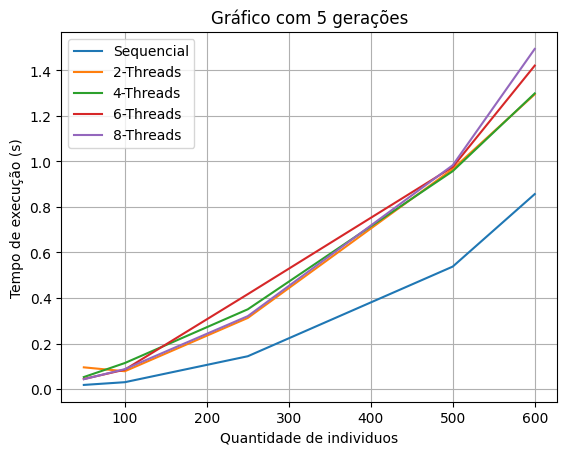

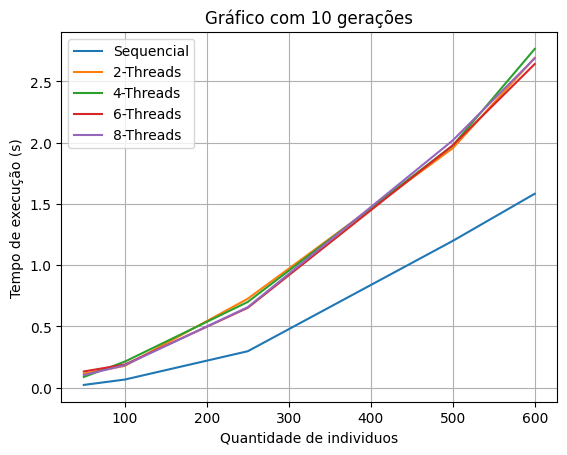

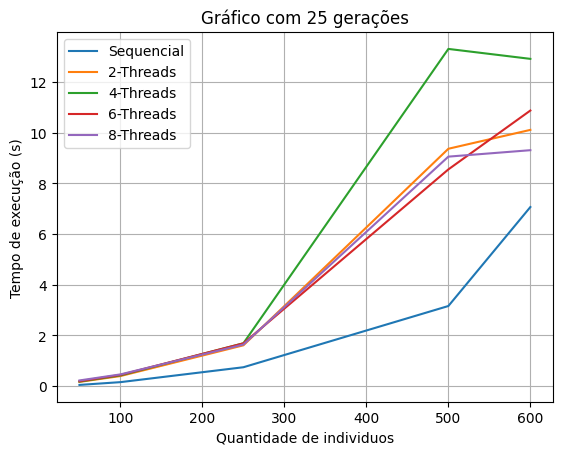

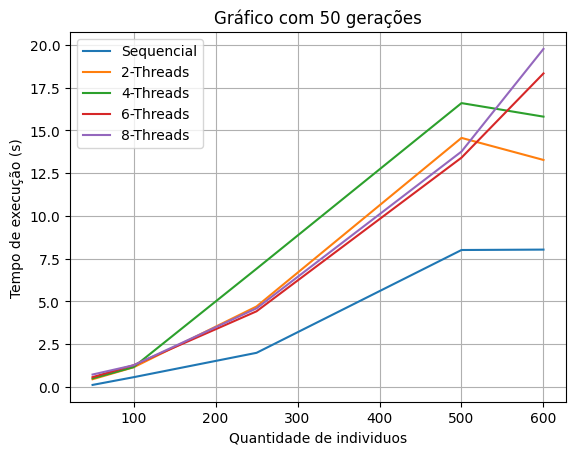

In [8]:
for geracoes in resultado_final: ## Percorre as gerações utilizadas no resultado

    dados_grafico_echo_x = [[] for x in range(len(lista_qtd_threads)+1)] ## Armazena os dado o tempo gasto nas exceuções para plot do grafico
    dados_grafico_echo_y = [resultado["individuos"] for resultado in geracoes["resultado"]] ## Armazena os dado de individuos para plot no grafico

    for resultado in geracoes["resultado"]: ## Percorre os resultados

        index = 0
        dados_grafico_echo_x[index].append([resultado["resultado_sequencial"], "Sequencial"])

        for resultado_paralelo in resultado["resultado_paralelo"]:
            index += 1
            dados_grafico_echo_x[index].append([resultado_paralelo["resultado"], str( str(resultado_paralelo["threads"]) + "-Threads")])

    for dados_echo_x in dados_grafico_echo_x:
        echo_x = [dado[0] for dado in dados_echo_x]
        plt.plot(dados_grafico_echo_y, echo_x, label=dados_echo_x[0][1])
    plt.xlabel("Quantidade de individuos")
    plt.ylabel("Tempo de execução (s)")
    plt.title("Gráfico com " + str(geracoes["geracao"]) + " gerações")
    plt.grid(True)
    plt.legend()
    plt.show()